<a href="https://colab.research.google.com/github/HeshamII/Loan-Prediction-using-ML-/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
data=pd.read_csv("/content/Data.csv")
data.drop(['Loan_ID'],axis=1,inplace=True)


Explore The data

In [3]:
data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


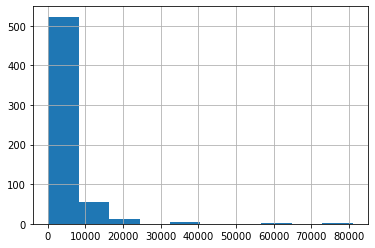

In [5]:
data['ApplicantIncome'].hist()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


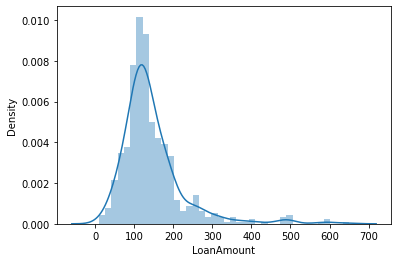

In [6]:
sns.distplot(data.LoanAmount)


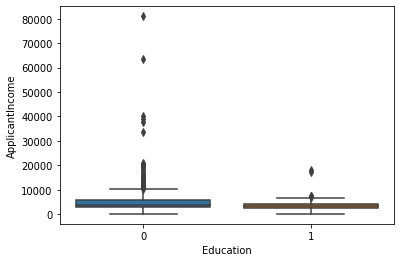

In [ ]:
sns.boxplot(x='Education',y='ApplicantIncome',data=data)
# 0= Graduated
# 1= Not Grad

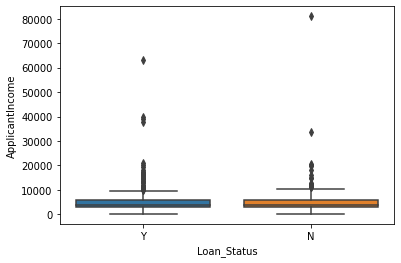

In [7]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data)


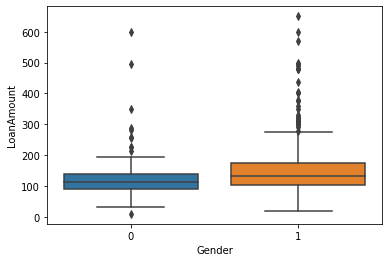

In [ ]:
sns.boxplot(x='Gender',y='LoanAmount',data=data)
# 0= female
# 1= male

The heatmap is showing the correlation between features

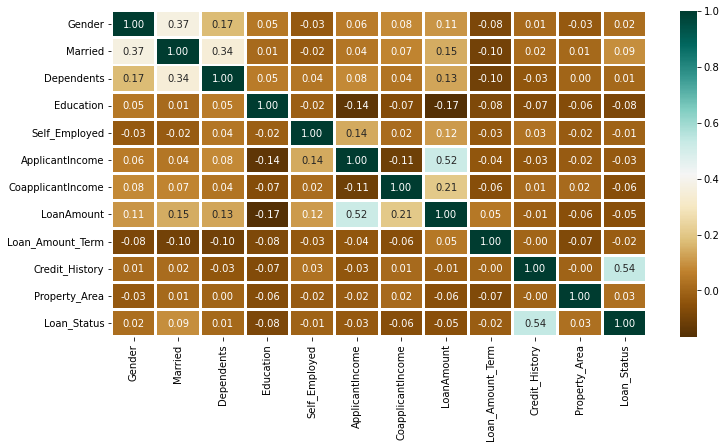

In [ ]:

plt.figure(figsize=(12,6))
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

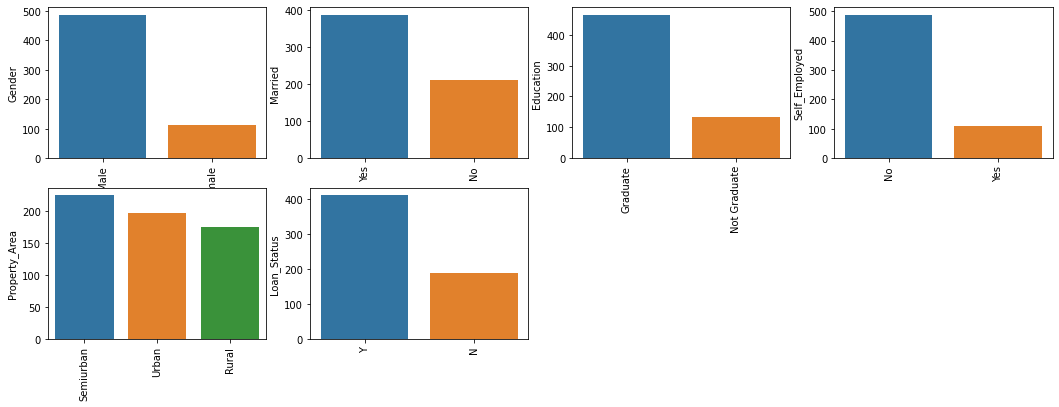

In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


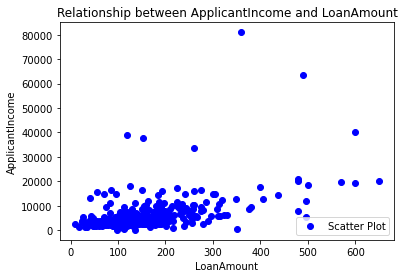

In [13]:
# Plot scatter plot between X and y
a=data['LoanAmount'].values
b=data['ApplicantIncome'].values
plt.scatter(a, b, color = 'blue', label='Scatter Plot')
plt.title('Relationship between ApplicantIncome and LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')
plt.legend(loc=4)
plt.show()

Data Preprocessing

In [ ]:
#turn loan status into binary 
modified=data
modified['Loan_Status']=data['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.081395
1.0    0.794816
Name: Loan_Status, dtype: float64

In [ ]:
data.apply(lambda x: sum(x.isnull()),axis=0)


Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
#numerical
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data.apply(lambda x: sum(x.isnull()),axis=0)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Process the outliers of LoanAmount and Applicant Income:


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


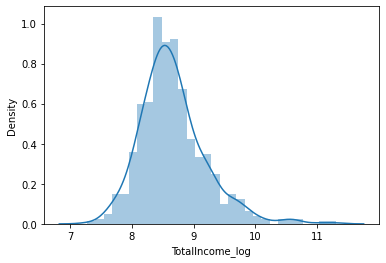

In [ ]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['TotalIncome']= data['ApplicantIncome'] +data['CoapplicantIncome'] 
data['TotalIncome_log']=np.log(data['TotalIncome'])
sns.distplot(data.TotalIncome_log)


In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in category:   
  data[i] = encoder.fit_transform(data[i]) 
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [ ]:
from sklearn import preprocessing
    
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


Model Building:


In [ ]:
from sklearn.model_selection import train_test_split
  
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30,
                                                    random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((418, 11), (180, 11), (418,), (180,))

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)


(598, 2)


(418, 11)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
lgr = LogisticRegression()
rdf = RandomForestClassifier(n_estimators=7)
knn = KNeighborsClassifier(n_neighbors=3)

svc = SVC()

# making predictions on the training set
for clf in (lgr, svc, rdf,knn):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(scores)))
    

Accuracy score of  LogisticRegression = 81.10047846889952


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Score : 81.107%
Accuracy score of  SVC = 68.89952153110048
Cross-Validation Score : 68.660%
Accuracy score of  RandomForestClassifier = 99.04306220095694
Cross-Validation Score : 77.283%
Accuracy score of  KNeighborsClassifier = 76.55502392344498
Cross-Validation Score : 59.317%


In [ ]:

# making predictions on the testing set
for clf in (rdf, knn, svc,lgr):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 73.33333333333333
Accuracy score of  KNeighborsClassifier = 65.0
Accuracy score of  SVC = 68.88888888888889
Accuracy score of  LogisticRegression = 79.44444444444444


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: ignored